# Assignment 8 : Decision Tree

#### Decision Tree : 
                - It is a graphical representation of all possible solutions to a decision based on certain conditions. 
                - some terminologies:
                                     1. Root node: It represents entire population or sample and this furthur gets divided   
                                        into two or more homogenous sets.
                                     2. Parent/Child node: Root node is the parent node and all other nodes branched from 
                                        it is known as child node.
                                     3. Leaf node: Node connot be further segregated into further nodes.
- In Decision tree corresponding to every decision we have an hyperplane, so all of our hyperplanes are axis-parallel, so intuitively Decision Tree is an "set of axis parallel hyperplanes".

** Splitting the decision tree can be done based on some terminologies:** 
     
      Entropy: it defines the randomness in the data and it can measures the impurity.
                     
                     
                    Entropy(s) = -P(yes) log(P(yes)) - P(no) log(P(no))
                            
                            where, 
                                   s is the total sample space
                                   P(yes) is probability of yes
                                   P(no) is probability of no 
                                   
                  properties: 1) For random variable Y, if probabilities are equally probable then entropy is at maximum 1.
                              2) if one class fully dominates then the entropy is 0.
    
    Information Gain: it can measures the reduction in entropy and decides which attribute should be selected as 
                        the decision node.
                           
                      Information Gain = Entropy(s) - [(Weighted Average) x Entropy(each feature)]
                      
                  properties: 1) For random variable Y, if probabilities are equally probable then information gain is 0.5.
                              2) if one class fully dominates then information gain is 0.
- Recursively break decision tree based on the information gain.
- When to stop tree:
            
                     1) occurrences of stop nodes.
                     2) when depth of the tree is more then at that time stop growing tree.
                     3) if incase at every node few points are available then stop tree.
- If depth of the tree increases more then model leads to overfitting problem.
- If depth of the tree is small then model leads to underfitting problem.
- In case of decision tree no need to do feature standardization.
- If dimension is large then decision tree is not good option to use.
- As depth increases then harder to understand what happening in decision tree which means interpretability decreases.
- It can handle large data and dimension should be less.
- For low latency requirements decision tree is good.
- In case of regression we can split the decision tree of each node using the mean square error which is minimum.
- Cases:

      1. Imbalanced data: Can be impacted while calculating the entropy or mean square error, so avoid that do upsampling 
                          or downsampling.
      2. Large Dimension: If dimension is large then at each node we have to split ,so to evaluate information gain of each 
                          feature by that time complexity to train decision tree increases more.
      3. Categorical features: Do one hot encoding, if categories are more then convert into numerical feature.
      4. Similarity matrix: Cann't work well in case of decision tree.

![title](Decision_Tree.png)

In [4]:
#we use to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle 
def savetofile(obj,filename):
    pickle.dump(obj,open(filename,"wb"))
    
def openfromfile(filename):
    temp=pickle.load(open(filename,"rb"))
    return temp

In [5]:
#Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from IPython.display import Image 
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import graphviz
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim

In [6]:
#Loading the dataset
data_frame = openfromfile("New_Amazon_preprocess_data")

In [7]:
#Shape of data
print("Shape of data_frame:", data_frame.shape)

#First five rows of the data_frame
data_frame.head()

Shape of data_frame: (364171, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
515425,515426,141278509X,AB1A5EGHHVA9M,CHelmic,1,1,positive,1332547200,The best drink mix,This product by Archer Farms is the best drink...,product archer farm best drink mix ever mix fl...
24750,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,positive,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...,dog love saw pet store tag attach regard made ...
24749,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,negative,1192060800,made in china,My dogs loves this chicken but its a product f...,dog love chicken product china wont buy anymor...
308076,308077,2841233731,A3QD68O22M2XHQ,LABRNTH,0,0,positive,1345852800,Great recipe book for my babycook,This book is easy to read and the ingredients ...,book easi read ingredi avail store unlik recip...
150523,150524,6641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...


In [8]:
#Storing the data_frame based on the time attribute
data_frame.sort_values('Time', inplace=True)

#Reseting the data_frame
data_frame.reset_index(drop=False, inplace=True)

In [9]:
#In the Score attribute consisting of two categories changing positive to 1 and negative to 0
data_frame.Score = [1 if(score == 'positive') else 0 for score in data_frame.Score]

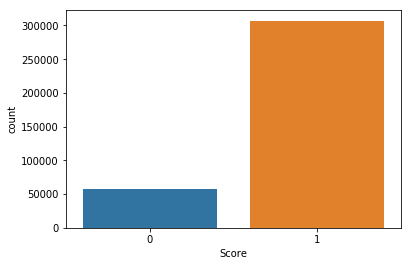

1    307061
0     57110
Name: Score, dtype: int64

In [10]:
#Count plot for score attribute 
sns.countplot(x=data_frame.Score, data=data_frame)
plt.show()
data_frame.Score.value_counts()

In [11]:
#Taking the top 100k points
data_frame_100k = data_frame[0:100000]

In [12]:
#storing CleanedText attribute into X as a independent variable and Score attribute  into y as a dependent variable
X = data_frame_100k.CleanedText

y = data_frame_100k.Score

In [13]:
#Splitting the data into train as 70% and test as 30%
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [14]:
#shape of train and test data
print("Shape of the train data:", X_tr.shape)

print("Shape of the test data:", X_test.shape)

Shape of the train data: (70000,)
Shape of the test data: (30000,)


# BOW: 

 which means makes a vector for each review of length unique words from the whole dataset and makes frequency count of word.
 
- Bow or Bag of Words which means way of extracting features from text for use in modeling.
- A bag-of-words is a representation of text that describes the occurrence of words within a document. 
   
   It involves two things:
                1.vocabulary of known words.
                2.Measure of the presence of known words.
-  It is called a “bag” of words, because any information about the order or structure of words in the document is              discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [15]:

%%time

count_vec = CountVectorizer()
#Making the fit_transform for train data
bow_tr = count_vec.fit_transform(X_tr)

Wall time: 2.21 s


In [16]:
#Transform for test data
bow_test = count_vec.transform(X_test)

In [17]:
#Shape of train and test data after the bag of words
print("shape of train data:", bow_tr.shape)
print("shape of test data:", bow_test.shape)

shape of train data: (70000, 37189)
shape of test data: (30000, 37189)


### Hyperparameter tunning using grid seach cross validation:

**  Grid Search Cross Validation:**

- working through multiple combinations of parameter tunes, cross validate each and determine                                  which one gives the best performance.      
    
- Note: In grid search, if you choosen n paramters then we will have to check 2^n combinations.

![title](grid search cross validation.png)

** Time based splitting:** 

- Provides train/test indices to split time series data samples that are observed at fixed time                                 intervals, in train/test sets.In each split, test indices must be higher than before, and thus shuffling in cross
  validator is inappropriate.

![title](time series split.png)

In [18]:
#Function for Grid Search Cross Validation
def grid_search(X_train, y_train):
    
    #(1 <= depth <= 20)
    values = [i for i in range(1,21)] 

    #Giving some set of parameters as input to grid search cross validation
    parameters = {'max_depth':values} 

    #splitting the data based on time of 5 folds
    tbs = TimeSeriesSplit(n_splits=5)      
    
    #measuring the quality of split using the entropy and making the data should be balanced
    clf = DecisionTreeClassifier(criterion='entropy', class_weight='balanced') 

    gsv = GridSearchCV(clf, parameters, cv=tbs, verbose=3, n_jobs=3, scoring='f1')

    gsv.fit(X_train,y_train)

    print("Max depth:",gsv.best_params_)
    print("Best F1-score:",gsv.best_score_*100)
    
    return gsv.grid_scores_, gsv.best_estimator_

In [19]:

%%time

#Calling the function for Grid Search Cross Validation
grid_scores, best_estimator = grid_search(bow_tr, y_tr)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    9.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  1.4min finished


Max depth: {'max_depth': 20}
Best F1-score: 83.24871820830502
Wall time: 1min 35s


In [20]:
grid_scores[:2]

[mean: 0.42954, std: 0.00503, params: {'max_depth': 1},
 mean: 0.54870, std: 0.00487, params: {'max_depth': 2}]

In [21]:
#Function for plot between F1_cv_errors and depth values

def depth_scores(depths, cv_f1_errors):
    plt.plot(depths,cv_f1_errors)
    plt.xlabel("depth values")
    plt.ylabel("cv_f1_scores")
    plt.title("depth vs CV_f1_errors")
    plt.show()

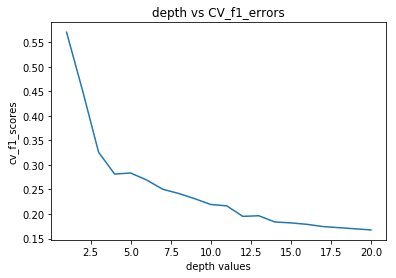

In [22]:
#From grid_scores storing max_depths into depth
depths = [val[0]['max_depth'] for val in grid_scores]

#From grid_scores storing mean f1_cross validation scores into cv_f1_scores
cv_f1_errors = [1-val[1] for val in grid_scores]

#plot for depths and cv_f1_errors
depth_scores(depths, cv_f1_errors)

** Testing the model from best_estimator which can be return by the grid search cross validation.**

In [23]:
#Result showing the best classifier consisting of parameters
best_estimator

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=20, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(bow_test)

In [25]:
#Function for calculating the metrics
def test_metrics(y_test, y_pred):
    cm = pd.DataFrame(confusion_matrix(y_test,y_pred),range(2),range(2))
    sns.set(font_scale=1.5)
    sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g', vmin=0, vmax=30000)

    print("Accuracy on test data:", round(accuracy_score(y_test, y_pred) * 100 , 2))
    print("Precision on test data:", round(precision_score(y_test, y_pred) * 100 , 2))
    print("Recall on test data:", round(recall_score(y_test, y_pred) * 100 , 2))
    print("F1_score on test data:", round(f1_score(y_test, y_pred) * 100,2))

    plt.show()

Accuracy on test data: 77.13
Precision on test data: 93.75
Recall on test data: 78.76
F1_score on test data: 85.6


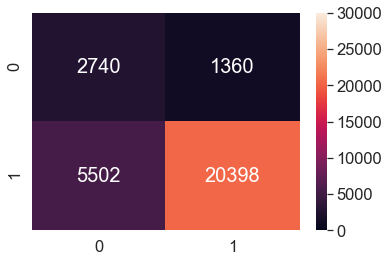

In [26]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

### Top 10 Impotant Features :

In [27]:
#Extracting important featurs from decision tree
features = best_estimator.feature_importances_

#Getting the top important feature indices
indices = np.argsort(features)[::-1][:20]

#Getting feature names from feature extracter object is count_vectorizer
fea_names = count_vec.get_feature_names()

In [28]:
#Function for ploting impotant features with their corresponding probability values
def imp_features(features, indices, fea_names):
  
    #sns.set(rc={'figure.figsize':(11.7,8.27)})
    
    # Create plot
    plt.figure()

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(20), features[indices])

    # Add feature names as x-axis labels
    names = np.array(fea_names)
    plt.xticks(range(20), names[indices], rotation=90)

    # Show plot
    plt.show()

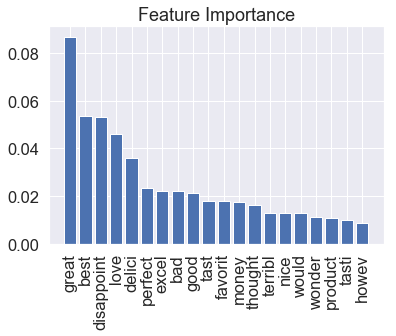

In [29]:
#Bar plot for important features with their probability values
imp_features(features, indices, fea_names)

# Graphviz: 
                    
** Which can be used to visualize the trained decision tree, to know how model works to predict the response label.**

In [30]:
#Function for graphical representation of the trained decision tree
def graphviz(classifier, features, response_feature):
    dot_data = StringIO() 
    export_graphviz(classifier, out_file=dot_data,max_depth=3,  
                             feature_names= features,  
                             class_names=response_feature,  
                             filled=True, rounded=True,  
                             special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

    return Image(graph.create_png())

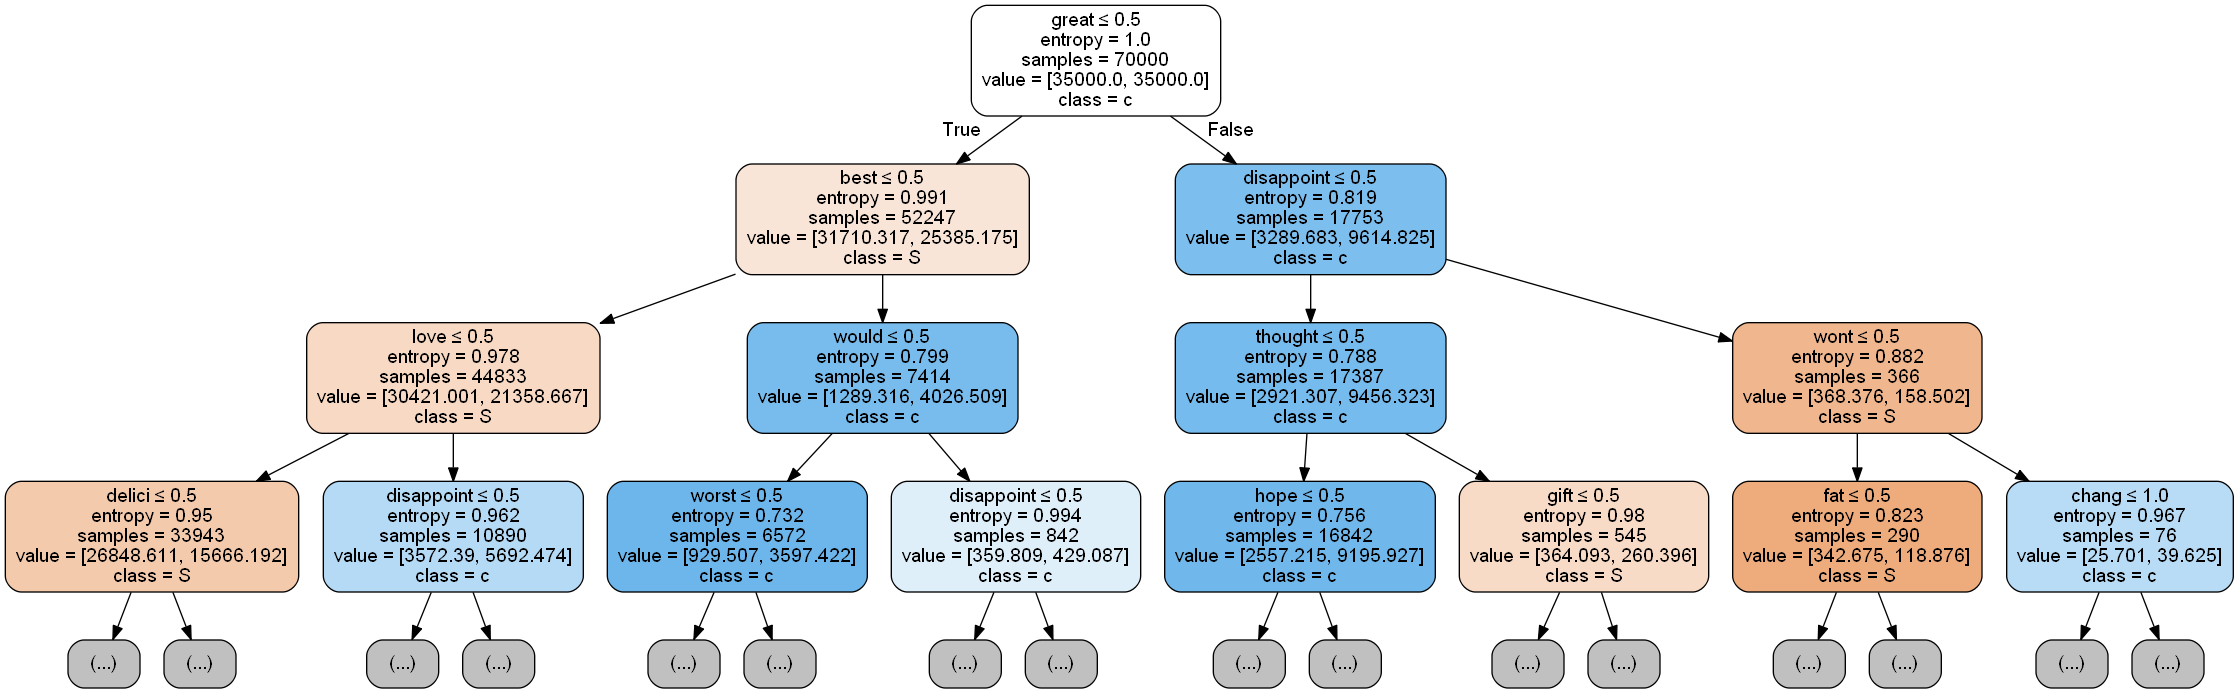

In [31]:
#Graphical visualization of the trained Decision Tree
graphviz(best_estimator, fea_names, data_frame_100k.columns[7])

# TFIDF: 

TF-IDF stands for term frequency-inverse document frequency. TF-IDF weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

Term_frequency(TF) = (number of times word occur in document) / (Total number of words in the document).

Inverse_Document_freqency(IDF) = log((total number of documents) / In which documents a word occurs))

                   So, TF-IDF(word) = TF(word) * IDF(word)

In [32]:
#Vectorizing the data
tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
tfidf_tr = tfidf_vect.fit_transform(X_tr)

In [33]:
#Vectorizing the test data
tfidf_test = tfidf_vect.transform(X_test)

In [34]:
#Shape of the train and test data
print("Shape of train data:", tfidf_tr.shape)
print("Shape of test data:", tfidf_test.shape)

Shape of train data: (70000, 932177)
Shape of test data: (30000, 932177)


### Hyperparameter tunning using grid seach cross validation:

** Grid Search Cross Validation:**

In [35]:

%%time

#Calling the function for Grid Search Cross Validation
grid_scores, best_estimator = grid_search(tfidf_tr, y_tr)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.7min
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed: 18.3min finished


Max depth: {'max_depth': 20}
Best F1-score: 82.7953779627519
Wall time: 19min 10s


In [36]:
#Which can return the cv_scores, std_dev and max_depth for all hyper parameters
grid_scores[:2]

[mean: 0.38351, std: 0.02836, params: {'max_depth': 1},
 mean: 0.52322, std: 0.02182, params: {'max_depth': 2}]

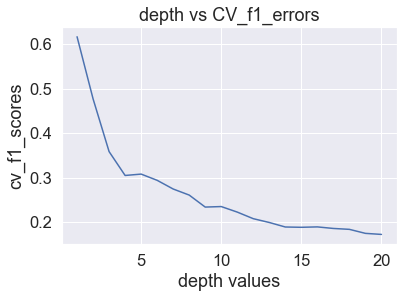

In [37]:
#From grid_scores storing max_depths into depth
depths = [val[0]['max_depth'] for val in grid_scores]

#From grid_scores storing mean f1_cross validation scores into cv_f1_scores
cv_f1_errors = [1-val[1] for val in grid_scores]

#plot for depths and cv_f1_errors
depth_scores(depths, cv_f1_errors)

** Testing the model from best_estimator which can be return by the grid search cross validation.**

In [38]:
#Result showing the best classifier consisting of parameters
best_estimator

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=20, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(tfidf_test)

Accuracy on test data: 76.7
Precision on test data: 94.09
Recall on test data: 77.9
F1_score on test data: 85.24


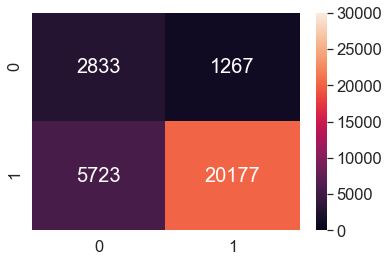

In [40]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

## Top 10 important features:

In [41]:
#Extracting important featurs from decision tree
features = best_estimator.feature_importances_

#Getting the top important feature indices
indices = np.argsort(features)[::-1][:20]

#Getting feature names from feature extracter object is count_vectorizer
fea_names = tfidf_vect.get_feature_names()

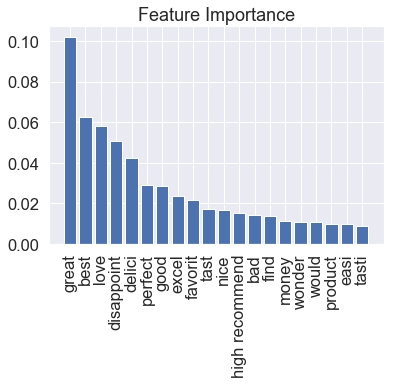

In [42]:
#Bar plot for important features with their probability values
imp_features(features, indices, fea_names)

## Visualizing the trained Decision Tree:

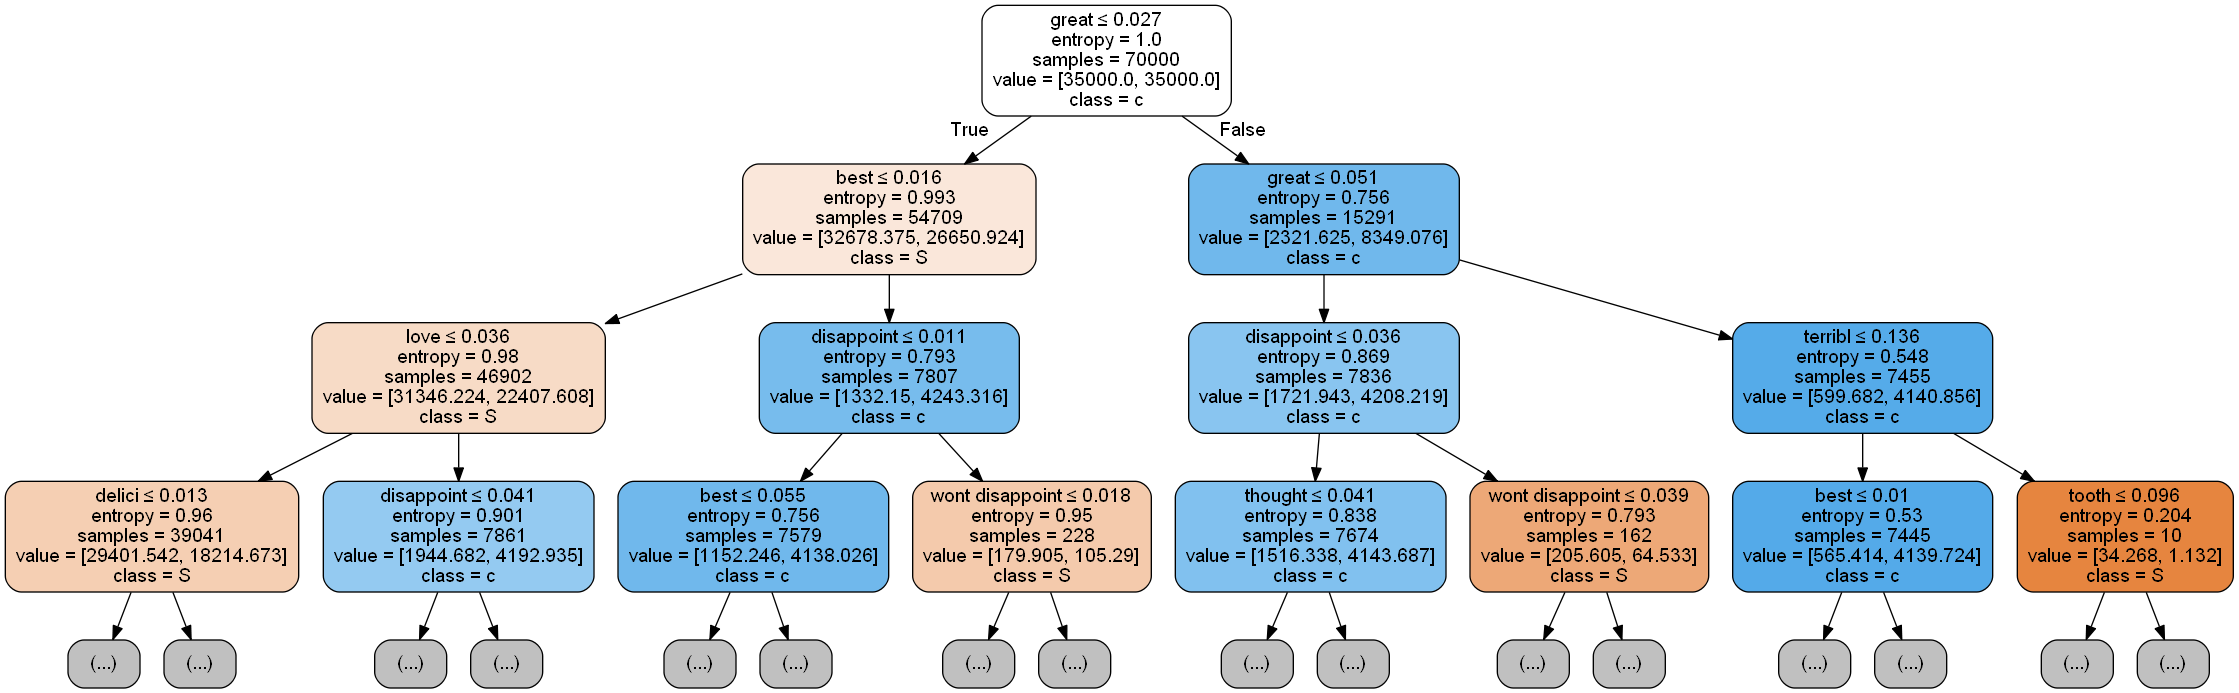

In [43]:
#Graphical visualization of the trained Decision Tree
graphviz(best_estimator, fea_names, data_frame_100k.columns[7])

# Avg_w2v: 
                    
          1. W2V can take the semantic meaning of the words.
          2. W2V can convert each word into an vector.
          3. Avg_W2V means for each review vector should be (W2V(word1) + W2V(word2)--------+ W2V(wordn)/(total no.of words).

In [44]:
#Forming the list_of_words for 100k reviews
sent_words = []
for sent in X:
    sent_words.append(sent.split())

In [45]:
#Splitting the into train and test data
X_tr_w2v, X_test_w2v, y_tr_w2v, y_test_w2v = train_test_split(sent_words, y, test_size=0.3, shuffle=False)

In [46]:
#Word to vectors for train data
w2v = gensim.models.Word2Vec(X_tr_w2v,min_count=5,size=50)

In [47]:
#storing w2v_words which can be return by w2v vocabilary
w2v_words = list(w2v.wv.vocab)
print("total words in w2v",len(w2v_words))
print(w2v_words[0:10])

total words in w2v 10701
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along']


In [48]:
#Function for Avg_w2v
def avg_w2v(data, w2v, w2v_words):
    #creating an empty list
    avg_vectors = []
    row = 0
    for sent in data:
        #creating an vector which size should be 50 and all cells have zero's
        sent_vec = np.zeros(50)
        cnt_words = 0
        for word in sent:
            if word in w2v_words:
                vec = w2v.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
            avg_vectors.append(sent_vec)
        row += 1 
        if cnt_words == 0:
            print(row)
    return avg_vectors

In [49]:

%%time 

#Avg w2v for train data
X_tr_avg_w2v = avg_w2v(X_tr_w2v, w2v, w2v_words)

Wall time: 1min 7s


In [52]:
#Avg w2v for test data
X_test_avg_w2v = avg_w2v(X_test_w2v, w2v, w2v_words)

### Hyperparameter tunning using grid seach cross validation:

** Grid Search Cross Validation:**

In [54]:

%%time

#Calling the function for Grid Search Cross Validation
grid_scores, best_estimator = grid_search(X_tr_avg_w2v, y_tr)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   27.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  1.9min finished


Max depth: {'max_depth': 20}
Best F1-score: 91.28832424195258
Wall time: 2min


In [55]:
#Which can return the cv_scores, std_dev and max_depth for all hyper parameters
grid_scores[:2]

[mean: 0.59932, std: 0.02166, params: {'max_depth': 1},
 mean: 0.79168, std: 0.01023, params: {'max_depth': 2}]

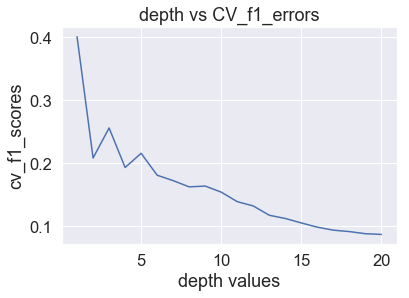

In [56]:
#From grid_scores storing max_depths into depth
depths = [val[0]['max_depth'] for val in grid_scores]

#From grid_scores storing mean f1_cross validation scores into cv_f1_scores
cv_f1_errors = [1-val[1] for val in grid_scores]

#plot for depths and cv_f1_errors
depth_scores(depths, cv_f1_errors)

** Testing the model from best_estimator which can be return by the grid search cross validation.**

In [57]:
#Result showing the best classifier consisting of parameters
best_estimator

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=20, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(X_test_avg_w2v) 

Accuracy on test data: 82.87
Precision on test data: 90.72
Recall on test data: 89.3
F1_score on test data: 90.0


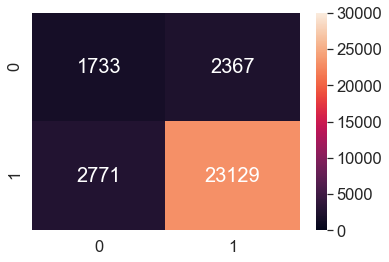

In [59]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

# TF-IDF W2V:

In [60]:
#Previously done tfidf_w2v with the 50k points
#Getting the train data
tfidf_w2v_tr = openfromfile("tfidf_w2v_train_of_50k_pts")
y_tr_w2v = openfromfile("tfidf_y_tr_w2v_of_50k_pts")

In [61]:
#Getting the test data
tfidf_w2v_test = openfromfile("tfidf_w2v_test_of_50k_pts")
y_test_w2v = openfromfile("tfidf_y_test_w2v_of_50k_pts")

In [62]:
#Shape of the train and test data
print("Length of the train data:", len(tfidf_w2v_tr))
print("Length of the test data:", len(tfidf_w2v_test))

Length of the train data: 35000
Length of the test data: 10164


### Hyperparameter tunning using grid seach cross validation:

** Grid Search Cross Validation:**

In [63]:

%%time

#Calling the function for Grid Search Cross Validation
grid_scores, best_estimator = grid_search(tfidf_w2v_tr, y_tr_w2v)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   14.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   54.6s finished


Max depth: {'max_depth': 19}
Best F1-score: 90.80168522657921
Wall time: 58.1 s


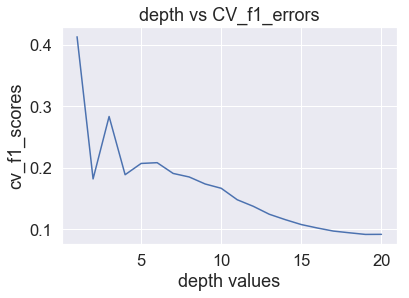

In [64]:
#From grid_scores storing max_depths into depth
depths = [val[0]['max_depth'] for val in grid_scores]

#From grid_scores storing mean f1_cross validation scores into cv_f1_scores
cv_f1_errors = [1-val[1] for val in grid_scores]

#plot for depths and cv_f1_errors
depth_scores(depths, cv_f1_errors)

** Testing the model from best_estimator which can be return by the grid search cross validation.**

In [65]:
#Result showing the best classifier consisting of parameters
best_estimator

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=19, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(X_test_avg_w2v) 

Accuracy on test data: 79.48
Precision on test data: 86.2
Recall on test data: 90.76
F1_score on test data: 88.42


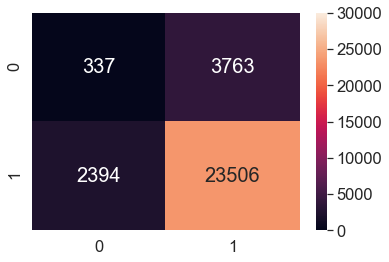

In [67]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

# Summary:

** Performance Table: **

- Given dataset is an imbalanced data which means majority class is positive and minority class is 
  negative, so i make balanced data using class_weight is equal to balanced.
- Measurring the quality of split i used entropy.



|Featurization  |sample size|CV           |Accuracy        |   F1-score  |Max_depth  |
|---------------|-----------|-------------|----------------|-------------|-----------|
|               |           |             |Test accuracy   |Test f1-score|           |             
| BOW           |100k       |Grid Search  |77.13%          |85.60%       |20         |         
|TF-IDF         |100k       |Grid Search  |76.70%          |85.24%       |20         |
|Avg-W2V        |100k       |Grid Search  |82.87%          |90.00%       |20         |
|TF-IDF W2V     |50k        |Grid Search  |79.48%          |88.42%       |19         |



** observation:**

- Among all text classifications, Avg_w2v is working well for this dataset.
- In case of BOW and TFIDF most important feature is "great".